In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
karachi_prefix = "../data/karachi/Karachi_PM2.5_"
new_delhi_prefix = "../data/new_delhi/NewDelhi_PM2.5_"
karachi_suffix = "_YTD.csv"
new_delhi_suffix = "_YTD.csv"

In [35]:
def create_karachi_filepath(year):
    karachi_filepath = f"{karachi_prefix}{year}{karachi_suffix}"
    return karachi_filepath

In [36]:
def create_new_delhi_filepath(year):
    new_delhi_filepath = f"{new_delhi_prefix}{year}{new_delhi_suffix}"
    return new_delhi_filepath

In [37]:
def build_karachi_df(years):
    
    karachi_df = pd.read_csv(create_karachi_filepath(years[0]))
    years.pop(0)
    
    for year in years:
        karachi_df = pd.merge(karachi_df, pd.read_csv(create_karachi_filepath(year)), on='Site', how='inner')
    
    karachi_df = karachi_df.drop(["Parameter"], axis=1)
    karachi_df = karachi_df.replace(to_replace="Invalid", value=np.nan)
    karachi_df = karachi_df.dropna()
    
    return karachi_df

In [38]:
karachi2019_df = build_karachi_df(["2019"])
karachi2020_df = build_karachi_df(["2020"])

In [39]:
karachi2019_df.tail()

,Site,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
5526,Karachi,2019-12-31 08:00 PM,2019,12,31,20,114.7,182,Unhealthy,131.8,UG/M3,1 Hr,Valid
5527,Karachi,2019-12-31 09:00 PM,2019,12,31,21,120.8,185,Unhealthy,127.3,UG/M3,1 Hr,Valid
5528,Karachi,2019-12-31 10:00 PM,2019,12,31,22,131.2,190,Unhealthy,143.2,UG/M3,1 Hr,Valid
5529,Karachi,2019-12-31 11:00 PM,2019,12,31,23,141.4,195,Unhealthy,153.5,UG/M3,1 Hr,Valid
5530,Karachi,2020-01-01 12:00 AM,2020,1,1,0,138.3,194,Unhealthy,134.6,UG/M3,1 Hr,Valid


In [40]:
karachi2020_df.tail()

,Site,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
8413,Karachi,2020-12-31 08:00 PM,2020,12,31,20,60.4,154,Unhealthy,60.0,UG/M3,1 Hr,Valid
8414,Karachi,2020-12-31 09:00 PM,2020,12,31,21,68.8,158,Unhealthy,77.0,UG/M3,1 Hr,Valid
8415,Karachi,2020-12-31 10:00 PM,2020,12,31,22,70.9,159,Unhealthy,73.0,UG/M3,1 Hr,Valid
8416,Karachi,2020-12-31 11:00 PM,2020,12,31,23,78.4,163,Unhealthy,86.0,UG/M3,1 Hr,Valid
8417,Karachi,2021-01-01 12:00 AM,2021,1,1,0,74.2,161,Unhealthy,70.0,UG/M3,1 Hr,Valid


In [46]:
karachi2019AQI = karachi2019_df["AQI"].to_numpy()
karachi2020AQI = karachi2020_df["AQI"].to_numpy()
karachi2019datetime = karachi2019_df["Date (LT)"].to_numpy()
karachi2020datetime = karachi2020_df["Date (LT)"].to_numpy()
print(karachi2019datetime)

['2019-05-14 10:00 AM' '2019-05-14 11:00 AM' '2019-05-14 12:00 PM' ...
 '2019-12-31 10:00 PM' '2019-12-31 11:00 PM' '2020-01-01 12:00 AM']


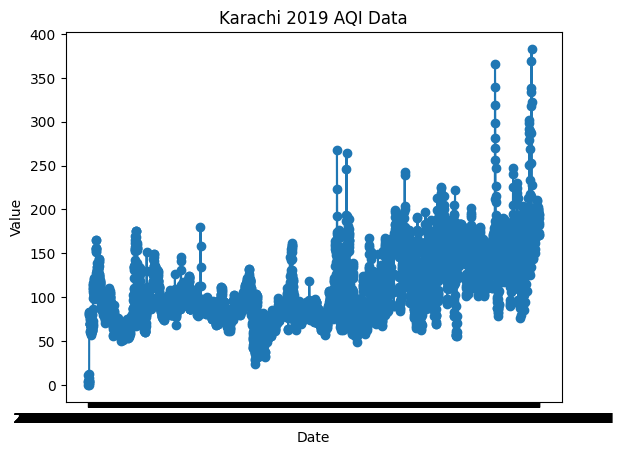

In [47]:
plt.plot(karachi2019datetime, karachi2019AQI, marker="o")
plt.title('Karachi 2019 AQI Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()